In [1]:
import numpy as np
import matplotlib.pyplot as plt
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)
columns_min = np.min(nations, axis=0)
columns_max = np.max(nations, axis=0)
nations_normalized = np.divide(np.subtract(nations, columns_min), np.subtract(columns_max, columns_min))

gdp_per_capita = np.multiply(np.divide(nations[:,3], nations[:,6]), 1000000)
gdppc_min = np.min(gdp_per_capita)
gdppc_max = np.max(gdp_per_capita)
gdp_per_capita_normalized = np.divide(np.subtract(gdp_per_capita, gdppc_min), np.subtract(gdppc_max, gdppc_min))


New best RMSE: 90.63464810436072
New best RMSE: 13.09872816002609
New best RMSE: 12.681917644865209
New best RMSE: 12.069171260692118
New best RMSE: 11.529704824808471
New best RMSE: 10.208588065011632
New best RMSE: 9.26130423215801
New best RMSE: 8.607226445470756
New best RMSE: 8.465140617094233
New best RMSE: 8.284334024717944
New best RMSE: 7.024080951685261
New best RMSE: 6.568840838266427
New best RMSE: 6.510389555234196
6.510389555234196
[ 0.78046557  0.89123449 -0.89253664]


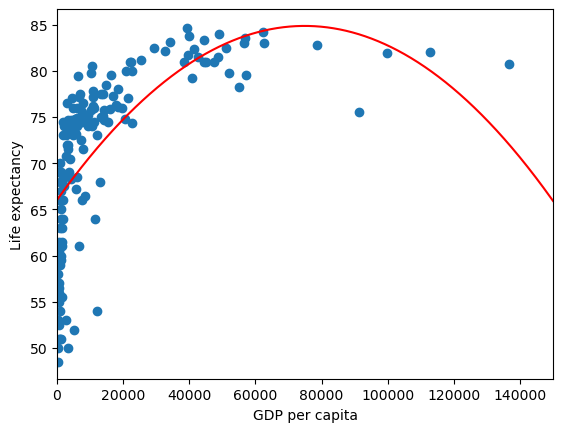

In [2]:
plt.scatter(gdp_per_capita, nations[:,4])
plt.xlim(0, 150000)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")


def coeffients(number):
    cV = np.random.uniform(low= -1.0, high=1.0, size=3)
    return cV

def polynomial(x, coeffients):
    y = 0
    for i in range(coeffients.shape[0]):
        y = np.add(y, np.multiply(coeffients[i], np.power(x, i)))

    return y

kArray = np.empty((0,3), float)
best_polynomial = 0
lifespan = nations[:,4]
lifespan_min = np.min(lifespan)
lifespan_max = np.max(lifespan)
best_k = 0

lowestRMSE = float("inf")

def rmse(orig, expec):
    rmseVal = np.sqrt(np.sum(np.power((orig - expec), 2))/orig.shape[0])
    return rmseVal

for i in range(10000):
    kArray = np.append(kArray, [coeffients(3)], axis= 0)
    lifespan_expecte_normalized = polynomial(gdp_per_capita_normalized, kArray[i])
    lifespan_expected = np.multiply(lifespan_expecte_normalized, (np.add(np.subtract(lifespan_max, lifespan_min), lifespan_min)))
    currentRmse = rmse(lifespan, lifespan_expected)
    if currentRmse < lowestRMSE:
        best_polynomial = lifespan_expected
        print("New best RMSE: " + str(currentRmse))
        lowestRMSE = currentRmse
        best_k = kArray[i]


#denormalize coefficients??

x = np.linspace(0, 1.0, 10000)
plot_x = np.linspace(0, 150000, 10000)
#best_k_denormalized = np.multiply(best_k, (np.add(np.subtract(columns_max[4], columns_min[4]), columns_max[4])))
plot_y = polynomial(x, best_k)
plot_y_denormalized = np.multiply(plot_y, (np.add(np.subtract(lifespan_max, lifespan_min), lifespan_min)))

print(lowestRMSE)
print(best_k)
#print(best_k_denormalized)


plt.plot(plot_x, plot_y_denormalized, 'r-')
plt.show()
